In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler


In [84]:
data = pd.read_csv('C://Users//basit//Downloads//tesla-stock-price.csv')[['close', 'volume', 'open', 'high', 'low']]


In [85]:
data['volume'] = data['volume'].str.replace(',', '').astype(float)


In [86]:
data

,close,volume,open,high,low
0,270.49,4787699.0,264.50,273.8800,262.2400
1,259.59,6189026.0,259.06,263.2800,254.5367
2,258.78,7189257.0,261.00,261.9900,252.0100
3,252.23,8128184.0,257.53,262.2500,249.0300
4,256.88,12781560.0,264.61,265.5100,247.7700
...,...,...,...,...,...
752,210.09,4177956.0,211.99,214.8100,208.8000
753,213.03,14877020.0,227.72,228.6000,202.0000
754,228.10,2506836.0,226.50,231.1500,224.9400
755,227.01,4327574.0,223.04,230.4805,222.8700


In [87]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [88]:
def create_sequences(data, step=90):
    X, Y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i+step])
        Y.append(data[i+step, 3])  
    return np.array(X), np.array(Y)

In [89]:
X, Y = create_sequences(data_scaled)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

In [90]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [99]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(50),
    Dense(1)
])


C:\Users\basit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=15, batch_size=10, validation_data=(X_test, Y_test))

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.2449 - val_loss: 0.0805
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0500 - val_loss: 0.0619
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0387 - val_loss: 0.0497
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0312 - val_loss: 0.0429
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0315 - val_loss: 0.0347
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0250 - val_loss: 0.0422
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0248 - val_loss: 0.0331
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0214 - val_loss: 0.0283
Epoch 9/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0203 - val_loss: 0.0272
Epoch 10/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0179 - val_loss: 0.0245
Epoch 11/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0164 - val_loss: 0.0232
Epoch 12/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0

In [107]:
predicted_scaled = model.predict(X_test)  
dummy_features = np.zeros((len(X_test), 4)) 

predictions = scaler.inverse_transform(np.concatenate((predicted_scaled, dummy_features), axis=1))[:, 0]  


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step 


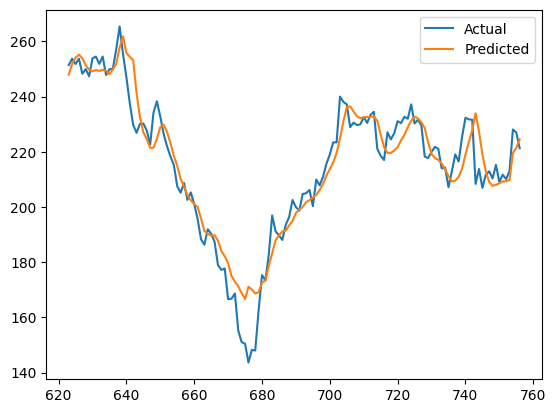

In [108]:
plt.plot(data.index[train_size+90:], data['close'].values[train_size+90:], label='Actual')
plt.plot(data.index[train_size+90:], predictions, label='Predicted')
plt.legend()
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 47713.10800067004
Root Mean Squared Error (RMSE): 218.43330332316555


In [110]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 217.22149672269776


In [111]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, predictions)
print(f"R-Squared Score: {r2}")



R-Squared Score: -261220.89168232057
